# Decision Tree

## Import statements 

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## Read the data.

In [3]:
data = np.asarray(pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/data_example_svm%2Bdt.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

In [4]:

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X, y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(acc)

1.0


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


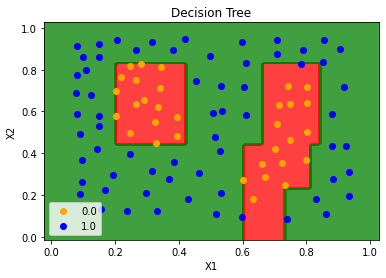

In [11]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Decision Tree')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Random Forest
建立多個決策樹，並將他們的輸出組合起來。

數顆分類決策樹：進行投票
數顆迴歸決策樹：取所有預測值的平均值
利用隨機取樣，來訓練每一顆決策樹。

優點：

由於每顆決策樹都是利用不同的資料建立起來的，每棵樹之間會有些許不同。
提供隨機性的來源→改變選擇的最佳屬性

## [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

## [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [7]:
# Fitting Random Forest to the Training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0 )
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 範例：Titanic

#### # Import our libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

#### Set a random seed

In [9]:
import random
random.seed(42)

#### Load the dataset
欄位敘述

1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [10]:

full_data = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/titanic_data.csv')
# in_file = 'titanic_data.csv'
# full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Store the 'Survived' feature in a new variable and remove it from the dataset

In [12]:
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)
display(features_raw.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Removing the names

In [13]:
features_no_name = features_raw.drop(['Name'], axis=1)
# features_no_name = features_raw.drop(['Name', 'Ticket', 'Cabin'], axis=1)
display(features_no_name.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


#### One-hot encoding

In [14]:
features = pd.get_dummies(features_no_name)
features = features.fillna(0.0)
display(features.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112379,Ticket_113028,Ticket_113043,Ticket_113050,Ticket_113051,Ticket_113055,Ticket_113056,Ticket_113059,Ticket_113501,Ticket_113503,Ticket_113505,Ticket_113509,Ticket_113510,Ticket_113514,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Import the classifier from sklearn

In [15]:

from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Making predictions

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Calculate the accuracy

In [17]:

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


#### Training the model

In [18]:

model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


The training accuracy is 0.8707865168539326
The test accuracy is 0.8547486033519553


# Applying Grid Search to find the best model and the best parameters

In [19]:

from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4, 5, 6, 7], 'min_samples_split': [8, 9, 10, 11, 12]}]
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

model = DecisionTreeClassifier(max_depth=best_parameters['max_depth'], min_samples_leaf=best_parameters['min_samples_leaf'], min_samples_split=best_parameters['min_samples_split'])
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

0.8020148669796556
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
The training accuracy is 0.8792134831460674
The test accuracy is 0.8435754189944135


# Metrics of Classification

|---|實際為真|實際為假|  
|---|---|---|
|預測為真| 真陽性|偽陽性
|預測為假| 偽陰性|真陰性


## Import models from sklearn

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

#### Instantiate a number of our models

In [22]:
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

## Fit each of the 4 models

In [23]:
naive_bayes.fit(X_train, y_train)
bag_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
svm_mod.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Make predictions using each of your models

In [24]:
preds_nb = naive_bayes.predict(X_test)
preds_bag = bag_mod.predict(X_test)
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_svm = svm_mod.predict(X_test)

# Accuracy Analysis

In [ ]:
naive_bayes.fit(X_train, y_train)

In [ ]:
def accuracy(actual, preds):
  return np.sum(preds == actual)/len(actual)
    
print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))

In [ ]:
def precision(actual, preds):

  tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
  pred_pos = (preds==1).sum()
  return tp/pred_pos

print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))

In [ ]:
def recall(actual, preds): 
  tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
  act_pos = (actual==1).sum()
  return tp/act_pos

print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))

In [ ]:
def f1(preds, actual):
  tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
  pred_pos = (preds==1).sum()
  prec = tp/(pred_pos)
  act_pos = (actual==1).sum()
  recall = tp/act_pos
  return (2*prec*recall)/(prec+recall)
    
print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))

In [ ]:
def print_metrics(y_true, preds):
  print('Accuracy score: ', format(accuracy_score(y_true, preds)))
  print('Precision score: ', format(precision_score(y_true, preds)))
  print('Recall score: ', format(recall_score(y_true, preds)))
  print('F1 score: ', format(f1_score(y_true, preds)))
  print('\n')

## Print scores

In [ ]:
print_metrics(y_test, preds_bag)
print_metrics(y_test, preds_rf)
print_metrics(y_test, preds_ada)
print_metrics(y_test, preds_nb)
print_metrics(y_test, preds_svm)